In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive

/content/drive/My Drive


#importing needed libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#unzip and load data

In [7]:
!unzip insurance-premium-prediction.zip

Archive:  insurance-premium-prediction.zip
  inflating: insurance.csv           


In [9]:
insurance = pd.read_csv('insurance.csv')
print(insurance.shape)
insurance.head(5)

(1338, 7)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


#Data visualization and analysis

In [10]:
insurance.info

<bound method DataFrame.info of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

In [12]:
insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


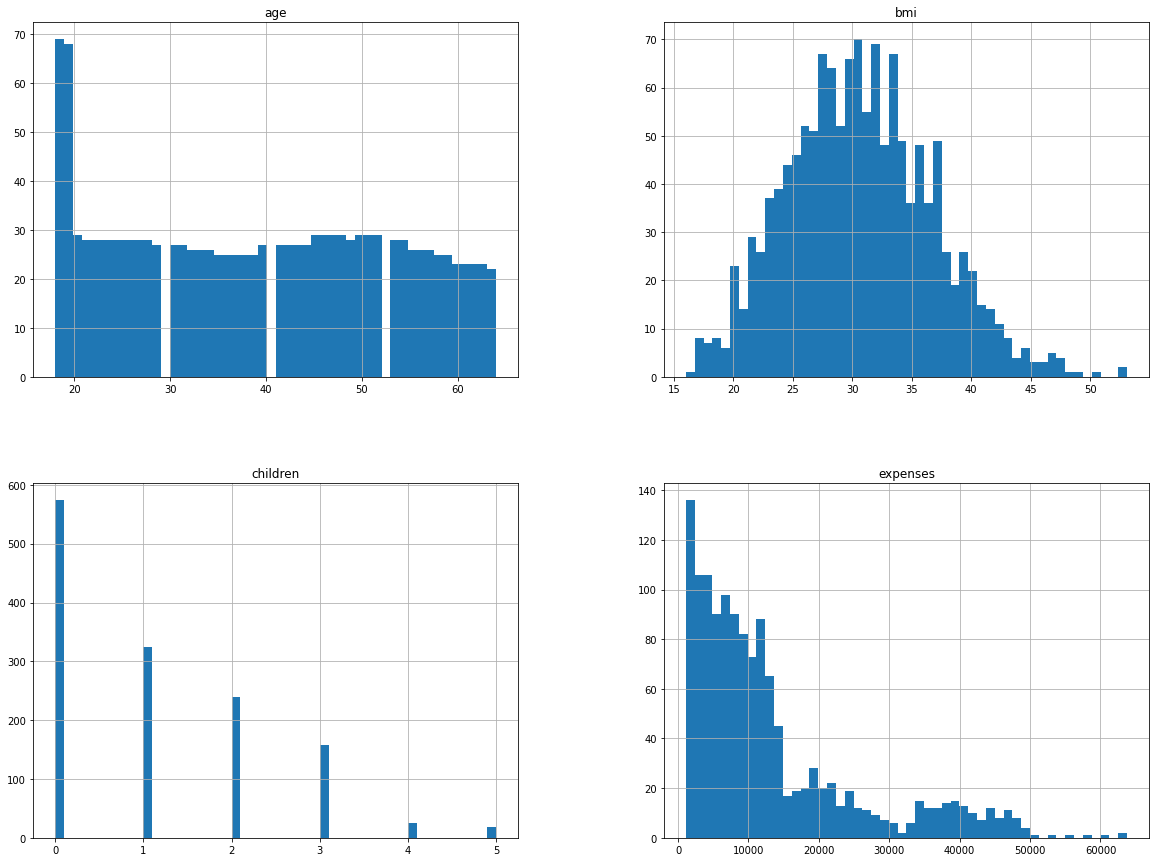

In [13]:
%matplotlib inline

insurance.hist(bins = 50, figsize = (20,15))
plt.show()

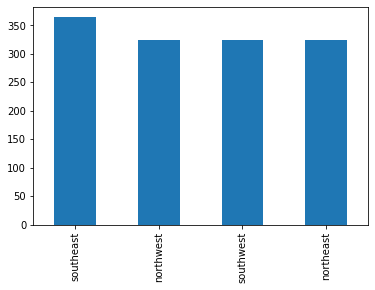

In [14]:
# Looking how the region parameter is distributed

insurance.region.value_counts().plot(kind="bar")
plt.show()



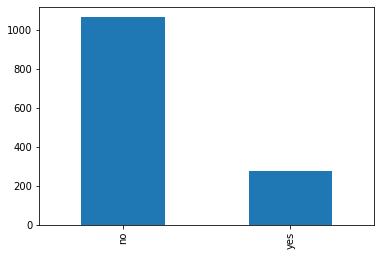

In [15]:
# Looking how the smoke paramter is distributed

insurance.smoker.value_counts().plot(kind='bar')
plt.show()

#split data into train and test set with stratify at AGE

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(insurance, test_size = 0.2, random_state = 42, stratify = insurance['age'])

print(train_set.shape)
print(test_set.shape)

(1070, 7)
(268, 7)


#preprocessing data for ml model

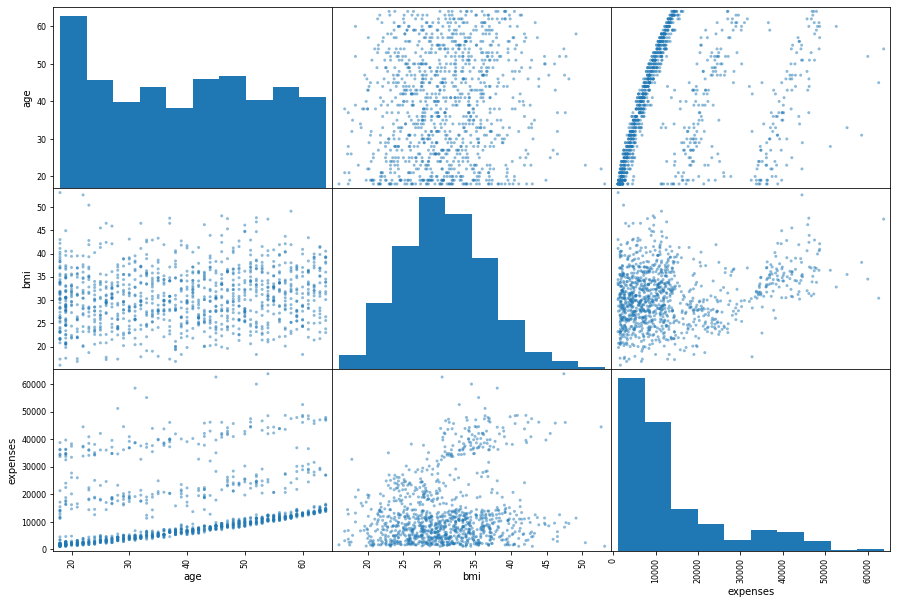

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["age", "bmi", "expenses"]
scatter_matrix(train_set[attributes], figsize=(15, 10))
plt.show()

In [20]:
attributes_train = train_set.drop('expenses', axis = 1)
attributes_labels = train_set['expenses'].copy()
attributes_train

,age,sex,bmi,children,smoker,region
1218,46,female,34.6,1,yes,southwest
669,40,female,29.8,1,no,southeast
618,19,female,33.1,0,yes,southeast
58,53,female,22.9,1,yes,southeast
902,26,male,27.3,3,no,northeast
...,...,...,...,...,...,...
165,47,male,28.2,4,no,northeast
367,42,female,25.0,2,no,northwest
1035,54,female,23.0,3,no,southwest
56,58,female,31.8,2,no,northeast


## categorical data encoding

In [22]:
cat_col=['smoker','region','sex']
print(cat_col)
num_col=[i for i in attributes_train.columns if i not in cat_col]
print(num_col)

['smoker', 'region', 'sex']
['age', 'bmi', 'children']


In [23]:
# one-hot encoding

one_hot = pd.get_dummies(attributes_train[cat_col])
data_onehot = pd.concat([attributes_train[num_col],one_hot],axis=1)

data_onehot.head(10)

,age,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
1218,46,34.6,1,0,1,0,0,0,1,1,0
669,40,29.8,1,1,0,0,0,1,0,1,0
618,19,33.1,0,0,1,0,0,1,0,1,0
58,53,22.9,1,0,1,0,0,1,0,1,0
902,26,27.3,3,1,0,1,0,0,0,0,1
867,57,43.7,1,1,0,0,0,0,1,0,1
1075,32,29.6,1,1,0,0,0,1,0,1,0
272,41,37.1,2,1,0,0,1,0,0,0,1
881,23,27.4,1,1,0,0,1,0,0,0,1
785,35,27.7,3,1,0,0,0,0,1,1,0


## Data scalling

In [24]:
from sklearn.preprocessing import MinMaxScaler  # Normalization (between 0 and 1)

scaler = MinMaxScaler()
scaler.fit(data_onehot)
data_scaled = scaler.transform(data_onehot)
data_scaled

array([[0.60869565, 0.50134771, 0.2       , ..., 1.        , 1.        ,
        0.        ],
       [0.47826087, 0.37196765, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.02173913, 0.46091644, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.7826087 , 0.18867925, 0.6       , ..., 1.        , 1.        ,
        0.        ],
       [0.86956522, 0.42587601, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.82608696, 0.69811321, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [25]:
final_df = pd.DataFrame(data_scaled, columns = ['age','bmi','children','smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest','sex_female','sex_male'])
print(final_df.shape)
final_df.head(5)

(1070, 11)


,age,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,0.608696,0.501348,0.2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.478261,0.371968,0.2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.021739,0.460916,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.760870,0.185984,0.2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.173913,0.304582,0.6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#Modelling

## Linear regression

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(final_df, attributes_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

insurance_pred = lin_reg.predict(final_df)
lin_mse = mean_squared_error(attributes_labels, insurance_pred)
lin_rmse = np.sqrt(lin_mse)

mae = mean_absolute_error(attributes_labels, insurance_pred)
r2 = r2_score(attributes_labels, insurance_pred)

print('MAE:' + ' ' + str(mae))
print('RMSE:' + ' ' + str(lin_rmse))
print('R2:' + ' ' + str(r2))

MAE: 4104.6192182234845
RMSE: 5987.457759343248
R2: 0.7606886351697412


###Plotting actual versus predicted values 

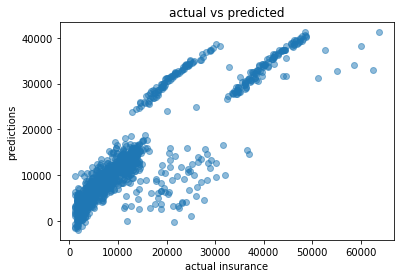

In [28]:
import matplotlib.pyplot as plt

plt.scatter(attributes_labels, insurance_pred, alpha = 0.5)
plt.title('actual vs predicted')
plt.xlabel('actual insurance')
plt.ylabel('predictions')
plt.show()

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(final_df, attributes_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
dtree_pred = dtree_reg.predict(final_df)
tree_mse = mean_squared_error(attributes_labels, dtree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

###Plotting actual versus predicted values

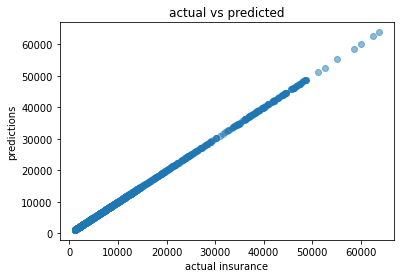

In [34]:
plt.scatter(attributes_labels, dtree_pred, alpha = 0.5)
plt.title('actual vs predicted')
plt.xlabel('actual insurance')
plt.ylabel('predictions')
plt.show()

##Using cross_validation to obtain more reliable results

In [36]:
from sklearn.model_selection import cross_val_score

# Cross Validation (Linear Reg Model)

lin_scores = cross_val_score(lin_reg, final_df, attributes_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)

lin_reg_scores = np.sqrt(-lin_scores)
print(lin_reg_scores)
print('Mean MSE:'+ ' ' + str(lin_reg_scores.mean()))
print(' Std: ' + str(lin_reg_scores.std()))

[5624.21864633 5305.28814061 5962.38739628 6766.3907851  6263.074215
 5286.47509554 5580.37599495 6322.28875186 6767.41200568 6331.62092418]
Mean MSE: 6020.953195552045
 Std: 525.8696771663447


In [38]:
# Cross Validation (Decision Tree_Reg Model)

lin_scores = cross_val_score(dtree_reg, final_df, attributes_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)

dtree_reg_scores = np.sqrt(-lin_scores)
print(dtree_reg_scores)
print('Mean MSE:'+ ' ' + str(dtree_reg_scores.mean()))
print(' Std: ' + str(dtree_reg_scores.std()))

[4695.23816546 5807.08749909 7323.54076008 6241.78417401 6819.4600888
 5882.10823743 5351.32877047 5796.92331501 7390.90737024 6703.56875562]
Mean MSE: 6201.194713620834
 Std: 819.8844672069972
